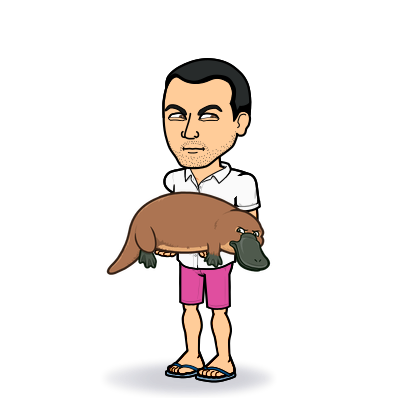

In [9]:
import pandas as pd
import csv
import xlrd
 


### Read data from an excel file via pandas 

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [12]:
sheet_1='participants'
sheet_2='Old_school_excel'

file_path='sample_data.xlsx'
rre_data=pd.read_excel(file_path,sheet_name=sheet_1,header=1)
rre_data=rre_data.fillna('')
rre_data.head(25)

,Groupe,Nom_prenom,numero_participant,Anniversaire,Compagnie,Salary,Dependants
0,G01,Bill Lumbergh,p1,1977-01-01,Initech,200000,
1,G02,Milton Waddams,p2,1968-01-01,Initech,50000,
2,G02,Peter Gibbons,p3,1983-01-01,Initech,650000,
3,G03,Carl Carlsen,p4,1980-06-25,Springfield Nuclear Power Plant Inc,125000,
4,G04,Lenny Leonard,P5,1977-04-23,Springfield Nuclear Power Plant Inc,125000,
5,G04,Homer Simpson,P6,1976-03-03,Springfield Nuclear Power Plant Inc,145000,Marge Simpson
6,G04,Homer Simpson,P6,1976-03-03,Springfield Nuclear Power Plant Inc,145000,Lisa Simpson
7,G04,Homer Simpson,P6,1976-03-03,Springfield Nuclear Power Plant Inc,145000,Bart Simpson
8,G04,Homer Simpson,P6,1976-03-03,Springfield Nuclear Power Plant Inc,145000,Maggie Simpson
9,G05,Charles Montgomery Burns,p7,1912-04-23,Springfield Nuclear Power Plant Inc,150000000,


### Read Excel using xlrd 

https://xlrd.readthedocs.io/en/latest/
this module is very useful when the excel data is not in a table/database format. 

In [14]:
loc = (file_path)
 
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_name(sheet_2)
 
#going through all rows 
for i in range(1,sheet.nrows):
    _row=''
    for j in range(0,sheet.ncols):
        
        _row=_row+str(sheet.cell_value(i, j))+','
        
    #print(_row[:-1])

    
    
# Extracting the merged cells value from its position
print("the merged cell value is: ",sheet.cell_value(5, 3))

the merged cell value is:  WOW C’est pas lisible pour un ordinateur ca! Mais c’est super beau pour un humain


## Data Wrangling from orignal dataset

### Method 1: from pandas' functions

In [18]:
rre_data=pd.read_excel(file_path,sheet_name=sheet_1,header=1)
rre_data=rre_data.fillna('')
rre_dependants=rre_data.groupby(['Groupe','Nom_prenom','numero_participant','Anniversaire','Compagnie']).agg({'Dependants':','.join}).reset_index().rename(columns={"Dependants": "Dependants_list"}).to_dict('records')
rre_dependants
for rre in rre_dependants:
    rre['Dependants_list']=rre['Dependants_list'].split(',')
rre_dependants[12:15]

[{'Groupe': 'G10',
  'Nom_prenom': 'Paulie Gualtieri',
  'numero_participant': 'P13',
  'Anniversaire': Timestamp('1949-12-25 00:00:00'),
  'Compagnie': 'Satriale Pork Store',
  'Dependants_list': ['']},
 {'Groupe': 'G10',
  'Nom_prenom': 'Sylvio Dante',
  'numero_participant': 'P12',
  'Anniversaire': Timestamp('1947-11-22 00:00:00'),
  'Compagnie': 'Ba Da Bing',
  'Dependants_list': ['Gabriela Dante']},
 {'Groupe': 'G10',
  'Nom_prenom': 'Tony Soprano',
  'numero_participant': 'P11',
  'Anniversaire': Timestamp('1959-08-22 00:00:00'),
  'Compagnie': 'Barone Sanitation',
  'Dependants_list': ['Carmela Soprano',
   'Anthony Jr Soprano',
   'Meadow Soprano']}]

### Method 2: using dictionaries and list only

In [7]:
#transform the dataframe into a list of dictionaries
list_records=rre_data.to_dict('records')
#print(list_dict[0])

#You must go throught all the elements to see which ones have numero_participant duplicates 

encounters=[]
duplicates=list()

for record in list_records:
    #assign a list to every record
    record['Dependants_list']=[]
    #test if you have seen this record before if you have then it's a duplicate
    if record['numero_participant'].lower() not in encounters:
        encounters.append(record['numero_participant'].lower())
    else:
        duplicates.append(record['numero_participant'].lower())



#once you have the list containing the duplicates numero_participant called duplicates

record_with_dependants=[] # the list of records where you increment the list of dependants
# You now go through the list of records again 
for record in list_records:
    
    if record['numero_participant'].lower() in duplicates:
        
        count=0
        
        for record_with_dependant in record_with_dependants:

            if (record['numero_participant']  and 
                record['Groupe'] == record_with_dependant['Groupe'] and
               record['Compagnie'] == record_with_dependant['Compagnie'] ):
                
                #if satisfied you have found a dictionary satisfying all the criterias above so you can add 
                #the record's dependant to the list
                record_with_dependant['Dependants_list'].append(record['Dependants'])
                count=count+1


            else:
                pass
        if count==0: # you haven't found a match in the list of record with dependants
            #the record becomes a new element of the record_with_dependant list
            record['Dependants_list'].append(record['Dependants'])
            record_with_dependants.append(record)



In [8]:
record_with_dependants

[{'Groupe': 'G04',
  'Nom_prenom': ' Homer Simpson',
  'numero_participant': 'P6',
  'Anniversaire': Timestamp('1976-03-03 00:00:00'),
  'Compagnie': 'Springfield Nuclear Power Plant Inc',
  'Salary': 145000,
  'Dependants': 'Marge Simpson',
  'Dependants_list': ['Marge Simpson',
   'Lisa Simpson',
   'Bart Simpson',
   'Maggie Simpson']},
 {'Groupe': 'G06',
  'Nom_prenom': ' Homer Simpson',
  'numero_participant': 'P6',
  'Anniversaire': Timestamp('1976-03-03 00:00:00'),
  'Compagnie': 'Springfield Bowling Alley',
  'Salary': 27500,
  'Dependants': 'Marge Simpson',
  'Dependants_list': ['Marge Simpson',
   'Lisa Simpson',
   'Bart Simpson',
   'Maggie Simpson']},
 {'Groupe': 'G10',
  'Nom_prenom': 'Tony Soprano',
  'numero_participant': 'P11',
  'Anniversaire': Timestamp('1959-08-22 00:00:00'),
  'Compagnie': 'Barone Sanitation',
  'Salary': 475000,
  'Dependants': 'Carmela Soprano',
  'Dependants_list': ['Carmela Soprano',
   'Anthony Jr Soprano',
   'Meadow Soprano']}]

In [214]:
all_data=record_with_dependants+[r for r in list_records if r['numero_participant'] not in duplicates]

In [215]:
all_data

[{'Groupe': 'G04',
  'Nom_prenom': ' Homer Simpson',
  'numero_participant': 'P6',
  'Anniversaire': Timestamp('1976-03-03 00:00:00'),
  'Compagnie': 'Springfield Nuclear Power Plant Inc',
  'Salary': 145000,
  'Dependants': 'Marge Simpson',
  'Dependants_list': ['Marge Simpson',
   'Lisa Simpson',
   'Bart Simpson',
   'Maggie Simpson']},
 {'Groupe': 'G06',
  'Nom_prenom': ' Homer Simpson',
  'numero_participant': 'P6',
  'Anniversaire': Timestamp('1976-03-03 00:00:00'),
  'Compagnie': 'Springfield Bowling Alley',
  'Salary': 27500,
  'Dependants': 'Marge Simpson',
  'Dependants_list': ['Marge Simpson',
   'Lisa Simpson',
   'Bart Simpson',
   'Maggie Simpson']},
 {'Groupe': 'G10',
  'Nom_prenom': 'Tony Soprano',
  'numero_participant': 'P11',
  'Anniversaire': Timestamp('1959-08-22 00:00:00'),
  'Compagnie': 'Barone Sanitation',
  'Salary': 475000,
  'Dependants': 'Carmela Soprano',
  'Dependants_list': ['Carmela Soprano',
   'Anthony Jr Soprano',
   'Meadow Soprano']},
 {'Groupe': '

In [38]:
import QuantLib as ql

test=str(int(ql.ActualActual().yearFraction(ql.Date(1, 1, 2020), ql.Date(1, 1, 2020))*365.25))+'D'
test

TypeError: Wrong number or type of arguments for overloaded function 'new_Date'.
  Possible C/C++ prototypes are:
    Date::Date()
    Date::Date(Day,Month,Year)
    Date::Date(Day,Month,Year,Hour,Minute,Second,Millisecond,Microsecond)
    Date::Date(Day,Month,Year,Hour,Minute,Second,Millisecond)
    Date::Date(Day,Month,Year,Hour,Minute,Second)
    Date::Date(BigInteger)
    Date::Date(std::string const &,std::string)


In [42]:
date_to_inflate_to=ql.Date(1,1,2030)

start_date=ql.Date(1,1,2022)
adj=ql.ActualActual().yearFraction(start_date,ql.Date(6,6,2022))*365.25
date_to_inflate_to=date_to_inflate_to+ql.Period(str(int(adj))+'D')
adj

156.1068493150685

In [43]:
date_to_inflate_to

Date(6,6,2030)

In [46]:
import datetime
datetime.date.today()

datetime.date(2022, 5, 26)

In [51]:
(datetime.date(2022,1,1)-datetime.date(2022, 5, 26)).days/365.25

-0.39698836413415467

In [56]:
type(datetime.datetime(2022, 5, 26))==datetime.datetime

True

In [58]:
(1+)**0.34541

1.1070186539167353

In [59]:
0.1+0.1+0.1

0.30000000000000004

In [60]:
0.2+0.2+0.2

0.6000000000000001